In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2,f_classif


In [17]:
df=pd.read_csv("../data/processed/data_o.csv")


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 18 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1516948 non-null  int64  
 1   timestamp        1516948 non-null  object 
 2   TP2              1516948 non-null  float64
 3   TP3              1516948 non-null  float64
 4   H1               1516948 non-null  float64
 5   DV_pressure      1516948 non-null  float64
 6   Reservoirs       1516948 non-null  float64
 7   Oil_temperature  1516948 non-null  float64
 8   Motor_current    1516948 non-null  float64
 9   COMP             1516948 non-null  float64
 10  DV_eletric       1516948 non-null  float64
 11  Towers           1516948 non-null  float64
 12  MPG              1516948 non-null  float64
 13  LPS              1516948 non-null  float64
 14  Pressure_switch  1516948 non-null  float64
 15  Oil_level        1516948 non-null  float64
 16  Caudal_impulses  1

In [19]:
df["Air_Leak"].value_counts()

Air_Leak
0    1486994
1      29954
Name: count, dtype: int64

In [20]:
df.drop(columns=["timestamp","Unnamed: 0"],inplace=True)


In [21]:
df.drop(columns=["COMP","H1","MPG"],inplace=True)


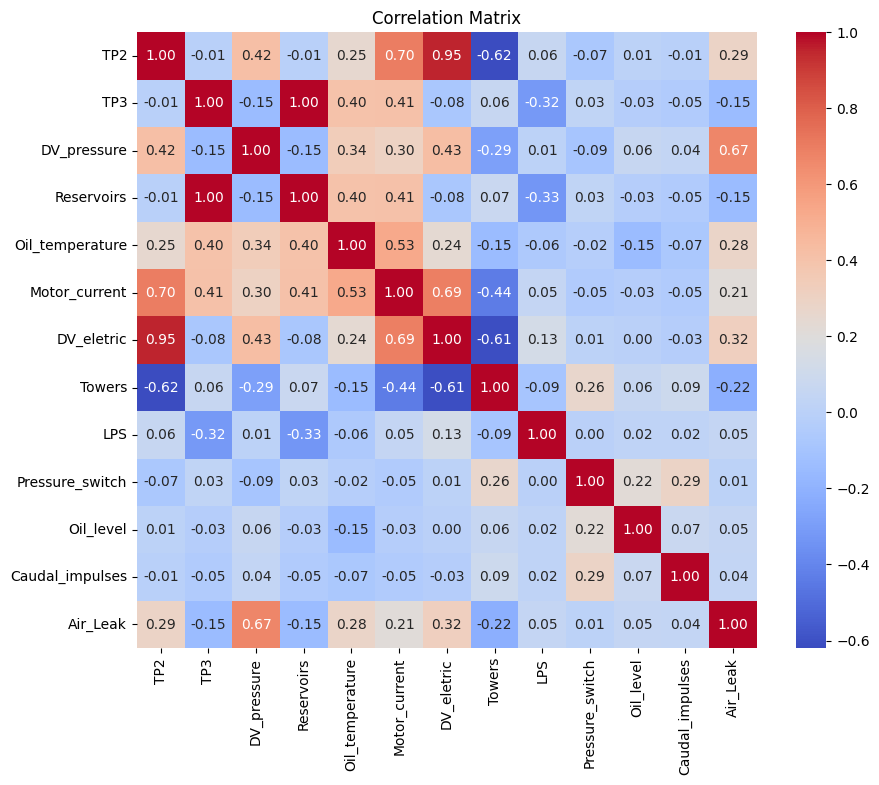

In [22]:
corr_matrix = df.corr().round(2)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Correlation Matrix")
plt.savefig("../images/corr_matrix_after_remove.jpg", bbox_inches='tight')
plt.show()


In [23]:
x=df.drop(columns=["Air_Leak"])
y=df["Air_Leak"]

In [ ]:
# Use ANOVA F-value for feature selection
selector = SelectKBest(score_func=f_classif, k=10)  # k as before, change as needed
X_new = selector.fit_transform(x, y)

# Get the selected feature names
selected_features = x.columns[selector.get_support()]

print("Selected features using ANOVA F-value:", selected_features)

In [24]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Create the RFE model and select the top features
rfe = RFE(model, n_features_to_select=10)
X_rfe = rfe.fit_transform(x, y)

# Get the selected feature names
selected_features_rfe = x.columns[rfe.support_]
print("Selected features (RFE):", selected_features_rfe)


Selected features (RFE): Index(['TP2', 'TP3', 'DV_pressure', 'Reservoirs', 'Oil_temperature',
       'Motor_current', 'DV_eletric', 'Towers', 'LPS', 'Caudal_impulses'],
      dtype='object')


In [25]:
# Fit a Random Forest model
model.fit(x, y)

# Get feature importance
importance = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': importance})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


            Feature  Importance
2       DV_pressure    0.353474
4   Oil_temperature    0.295161
3        Reservoirs    0.104153
1               TP3    0.101916
0               TP2    0.072715
5     Motor_current    0.049636
6        DV_eletric    0.015811
7            Towers    0.003004
8               LPS    0.001323
11  Caudal_impulses    0.001239
10        Oil_level    0.000976
9   Pressure_switch    0.000594
